Otsu Implemente el algoritmo de segmentación de Otsu. Utilice la imagen rice.png y y
compare con otros detectores como greythreshold de matlab u otro

In [ ]:
import cv2
import numpy as np
from skimage import filters
import matplotlib.pyplot as plt

array([[122,  92,  95, ..., 101, 100,  92],
       [ 99,  99, 102, ..., 105,  93,  93],
       [ 97, 107, 103, ...,  96,  95, 103],
       ...,
       [ 51,  58,  46, ...,  63,  49,  55],
       [ 52,  52,  53, ...,  65,  52,  54],
       [ 59,  51,  52, ...,  65,  46,  42]], dtype=uint8)
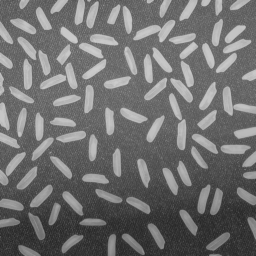

In [ ]:
image = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)
image

In [ ]:
def otsu_manual(image):
    hist, bins = np.histogram(image.ravel(), bins=256, range=(0, 256))
    total_pixels = image.size
    prob = hist / total_pixels
    max_variance = 0
    optimal_threshold = 0
    promediotot = np.sum([i * prob[i] for i in range(256)])  # Media global
    peso_background = 0
    prombackgroud = 0

    for t in range(256):
        peso_background += prob[t]
        prombackgroud += t * prob[t]
        peso_foreground = 1 - peso_background # Peso del primer plano (restante)

        if peso_background == 0 or peso_foreground == 0: # Se podía romper
            continue
        promforeground = (promediotot - prombackgroud) / peso_foreground # Media del primer plano


        # Varianza interclase
        variance_interclass = (peso_background * peso_foreground * (prombackgroud - promforeground) ** 2)
        # Actualizar el mejor umbral si la varianza es máxima
        if variance_interclass > max_variance:
            max_variance = variance_interclass
            optimal_threshold = t

    return optimal_threshold

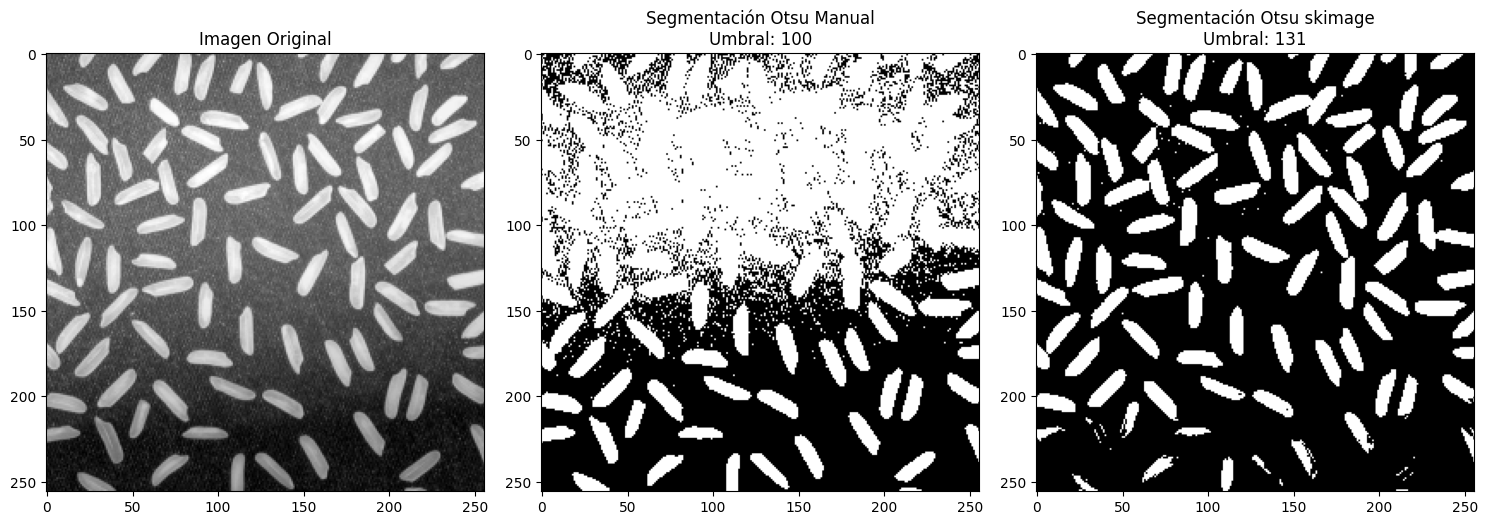

In [ ]:
optimal_threshold = otsu_manual(image)

_, otsu_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Método de greythreshold (scikit-image)
greythreshold_value = filters.threshold_otsu(image)
greythreshold_result = (image > greythreshold_value).astype(np.uint8) * 255

# Aplicar la binarización usando el umbral calculado
otsu_result = (image > optimal_threshold).astype(np.uint8) * 255

# Visualizar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title(f"Segmentación Otsu Manual\nUmbral: {optimal_threshold}")
plt.imshow(otsu_result, cmap='gray')

plt.subplot(1, 3, 3)
plt.title(f"Segmentación Otsu skimage\nUmbral: {greythreshold_value}")
plt.imshow(greythreshold_result, cmap='gray')

plt.tight_layout()
plt.show()